# Meta learning and baseline comparison

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import lightgbm as ltb

# Custom classes
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
from meta_learning import evaluator
from utils import MetaEvaluator

## Macros

In [11]:
META_LABEL_METRIC = "precision"
BASE_MODEL = "RandomForestClassifier"
DATASET = "electricity"
INCLUDE_DRIFT_METRICS = False

FILENAME = f"basemodel: {BASE_MODEL} - metric: {META_LABEL_METRIC} - dataset: {DATASET}"
if INCLUDE_DRIFT_METRICS:
    FILENAME += " - with_drift_metrics"

In [12]:
META_LEARNING_COL = "meta_learning"
BASELINE_COL = "baseline"
TARGET_COL = "target"

## Read data

In [13]:
df = pd.read_csv(f"../metabases/{FILENAME}.csv")
df = df.rename(columns={"predicted": META_LEARNING_COL, f"last_{META_LABEL_METRIC}": BASELINE_COL, META_LABEL_METRIC: TARGET_COL})
df = df[[TARGET_COL, META_LEARNING_COL, BASELINE_COL]].dropna()
df.head()

,target,meta_learning,baseline
97,0.739130,0.729223,0.653061
98,0.813559,0.729223,0.653061
99,0.925926,0.729223,0.653061
100,0.869565,0.729223,0.653061
101,0.792683,0.729223,0.653061


In [14]:
meta_eval = MetaEvaluator(
    baseline_col = "baseline",
    mtl_col = "meta_learning",
    target_col = "target",
    eta = 50,
    step = 5
)
meta_eval.fit(df)

Cumulative gain definition: mse(baseline) - mse(metalearning)


0.4664255850892399

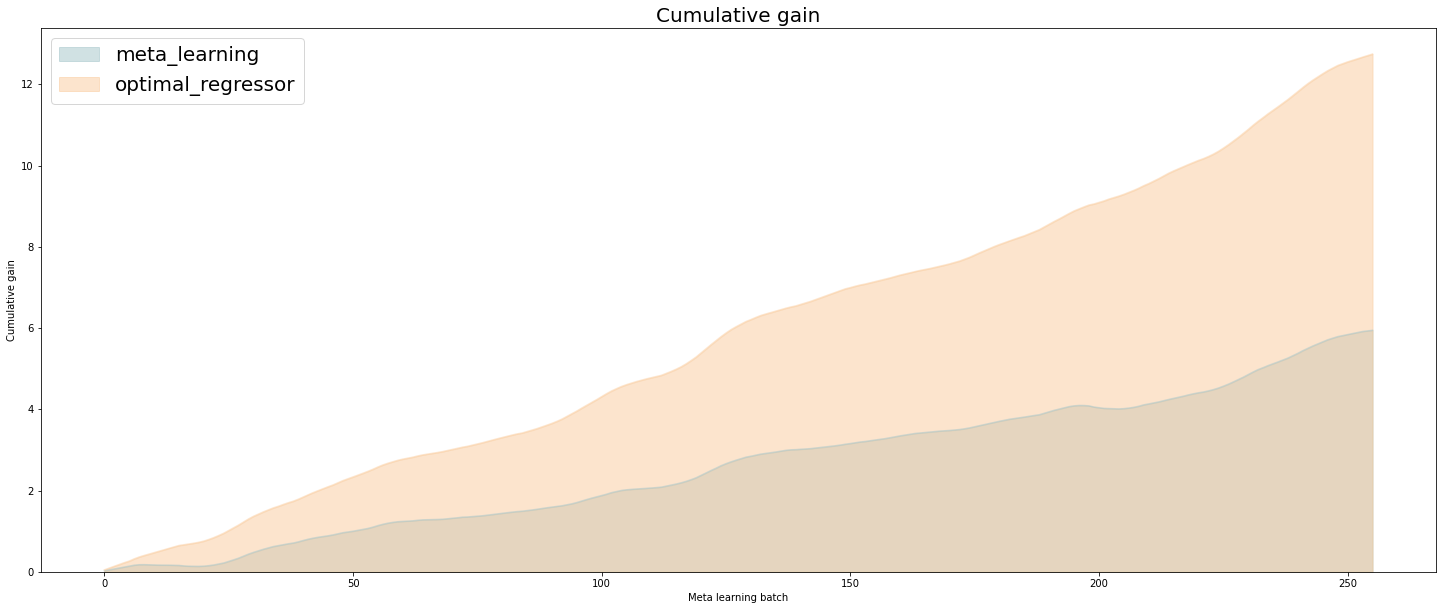

In [15]:
meta_eval.plot_cumulative_gain()

In [16]:
# meta_eval.plot_results()

In [17]:
with open(f"../models/{FILENAME}.pickle", "rb") as f:
        model = pickle.load(f)
model

LGBMRegressor(feature_fraction=0.4, lambda_l1=30, lambda_l2=40, max_bin=187,
              max_depth=3, min_data_in_leaf=5,
              min_gain_to_split=9.73379260262309, num_leaves=15,
              path_smooth=32.95215638116842, random_state=2022, verbose=-1)

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 20))
ltb.plot_importance(model, max_num_features=50, ax=ax)

ValueError: not enough values to unpack (expected 2, got 0)